# Задача мэтчинга

In [55]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from sklearn.neighbors import NearestNeighbors


import matplotlib.pyplot as plt
from importlib import reload

from tqdm import tqdm

In [56]:
!pip install faiss-cpu

In [57]:
import faiss

In [58]:
!pip install phik -q

In [59]:
from matplotlib import pyplot as plt


import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
df = pd.read_csv(r'C:\Users\Igor\Downloads\data\base.csv')
len(df)

2918139

In [62]:
df.head(5)

,Id,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,70,71
0,0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,-469.070588,44.348083,120.915344,...,-42.808693,38.800827,-151.76218,-74.389090,63.66634,-4.703861,92.933610,115.269190,-112.756640,-60.830353
1,1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-85.076666,-35.637436,119.718636,...,-117.767525,41.100000,-157.82940,-94.446806,68.20211,24.346846,179.937930,116.834000,-84.888941,-59.524610
2,2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,52.554795,62.381706,128.951450,...,-76.397800,46.011803,-207.14442,127.325570,65.56618,66.325680,81.073490,116.594154,-1074.464888,-32.527206
3,3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-383.182845,-33.611237,122.031910,...,-70.647940,-6.358921,-147.20105,-37.692750,66.20289,-20.566910,137.206940,117.474100,-1074.464888,-72.915490
4,4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,-397.711282,45.182500,122.167180,...,-57.199104,56.642403,-159.35184,85.944724,66.76632,-2.505783,65.315285,135.051590,-1074.464888,0.319401


In [63]:
df_train = pd.read_csv(r'C:\Users\Igor\Downloads\data\train.csv')
df_train.head(5)

,Id,0,1,2,3,4,5,6,7,8,...,63,64,65,66,67,68,69,70,71,Target
0,0-query,-53.882748,17.971436,-42.117104,-183.93668,187.517490,-87.144930,-347.360606,38.307602,109.085560,...,70.107360,-155.80257,-101.965943,65.903790,34.457500,62.642094,134.763600,-415.750254,-25.958572,675816-base
1,1-query,-87.776370,6.806268,-32.054546,-177.26039,120.803330,-83.810590,-94.572749,-78.433090,124.915900,...,4.669178,-151.69771,-1.638704,68.170876,25.096191,89.974976,130.589630,-1035.092211,-51.276833,366656-base
2,2-query,-49.979565,3.841486,-116.118590,-180.40198,190.128430,-50.837620,26.943937,-30.447489,125.771164,...,78.039764,-169.14620,82.144186,66.008220,18.400496,212.409730,121.931470,-1074.464888,-22.547178,1447819-base
3,3-query,-47.810562,9.086598,-115.401695,-121.01136,94.652840,-109.255410,-775.150134,79.186520,124.003100,...,44.515266,-145.41675,93.990981,64.131350,106.061920,83.178760,118.277725,-1074.464888,-19.902788,1472602-base
4,4-query,-79.632126,14.442886,-58.903397,-147.05254,57.127068,-16.239529,-321.317964,45.984676,125.941284,...,45.028910,-196.09207,-117.626337,66.926220,42.456170,77.621765,92.479930,-1074.464888,-21.149351,717819-base


In [64]:
df_validation = pd.read_csv(r'C:\Users\Igor\Downloads\data\validation.csv')
df_validation.head(5)

,Id,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,70,71
0,100000-query,-57.372734,3.597752,-13.213642,-125.92679,110.74594,-81.279594,-461.003172,139.815720,112.880980,...,-75.51302,52.830902,-143.43945,59.051935,69.28224,61.927513,111.59253,115.140656,-1099.130485,-117.079360
1,100001-query,-53.758705,12.790300,-43.268543,-134.41762,114.44991,-90.520130,-759.626065,63.995087,127.117905,...,-79.44183,29.185436,-168.60590,-82.872443,70.76560,-65.975950,97.07716,123.391640,-744.442332,-25.009320
2,100002-query,-64.175095,-3.980927,-7.679249,-170.16093,96.44616,-62.377740,-759.626065,87.477554,131.270110,...,-134.79541,37.368730,-159.66231,-119.232725,67.71044,86.002060,137.63641,141.081630,-294.052271,-70.969604
3,100003-query,-99.286860,16.123936,9.837166,-148.06044,83.69708,-133.729720,58.576403,-19.046660,115.042404,...,-77.23611,44.100494,-132.53012,-106.318982,70.88396,23.577892,133.18396,143.252940,-799.363667,-89.392670
4,100004-query,-79.532920,-0.364173,-16.027431,-170.88495,165.45392,-28.291668,33.931936,34.411217,128.903980,...,-123.77025,45.635944,-134.25893,13.735359,70.61763,15.332115,154.56812,101.700640,-1171.892332,-125.307890


In [65]:
df_validation_target = pd.read_csv(r'C:\Users\Igor\Downloads\data\validation_answer.csv')
df_validation_target.head(5)

,Id,Expected
0,100000-query,2676668-base
1,100001-query,91606-base
2,100002-query,472256-base
3,100003-query,3168654-base
4,100004-query,75484-base


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918139 entries, 0 to 2918138
Data columns (total 73 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   0       float64
 2   1       float64
 3   2       float64
 4   3       float64
 5   4       float64
 6   5       float64
 7   6       float64
 8   7       float64
 9   8       float64
 10  9       float64
 11  10      float64
 12  11      float64
 13  12      float64
 14  13      float64
 15  14      float64
 16  15      float64
 17  16      float64
 18  17      float64
 19  18      float64
 20  19      float64
 21  20      float64
 22  21      float64
 23  22      float64
 24  23      float64
 25  24      float64
 26  25      float64
 27  26      float64
 28  27      float64
 29  28      float64
 30  29      float64
 31  30      float64
 32  31      float64
 33  32      float64
 34  33      float64
 35  34      float64
 36  35      float64
 37  36      float64
 38  37      float64
 39  38      float64
 40  

Пропуски отсутствуют и все типы данных интервальные

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>,
        <Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>],
       [<Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
        <Axes: title={'center': '26'}>, <Axes: title={'center': '27'}>,

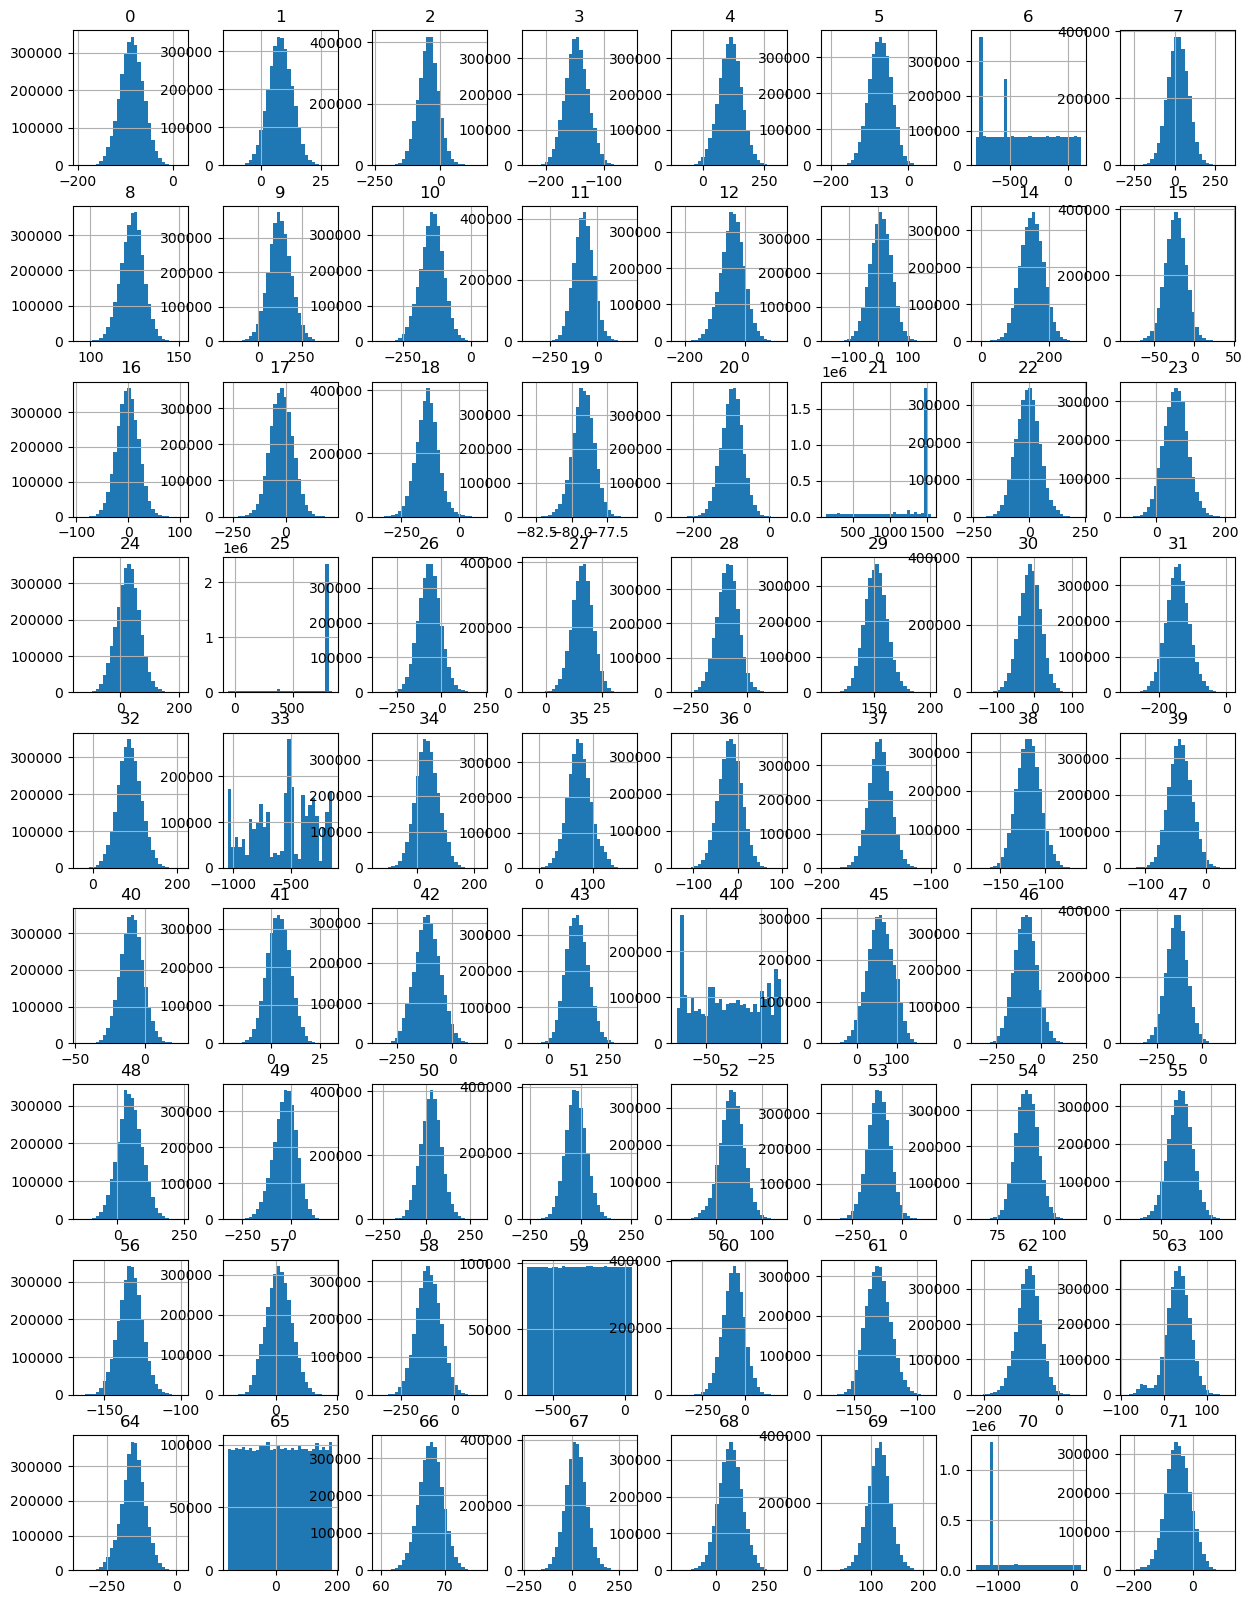

In [68]:
df.hist(bins = 30, figsize=(15, 20))

Странные признаки:
- 6
- 21
- 25
- 33
- 44
- 59
- 65
- 70
Удалим их

In [70]:
df.drop(['6','21','25','33','44','59','65','70'], axis= 1 , inplace= True )

In [71]:
len(df)
df = df.drop_duplicates()

In [72]:
len(df)

2918139

In [73]:
df_train.drop(['6','21','25','33','44','59','65','70'], axis= 1 , inplace= True )
len(df_train)
df_train = df_train.drop_duplicates()

In [74]:
len(df_train)

100000

In [75]:
df_validation.drop(['6','21','25','33','44','59','65','70'], axis= 1 , inplace= True )

In [76]:
interval_cols = df.columns[1:]
interval_cols

Index(['0', '1', '2', '3', '4', '5', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '26', '27',
       '28', '29', '30', '31', '32', '34', '35', '36', '37', '38', '39', '40',
       '41', '42', '43', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '60', '61', '62', '63', '64', '66', '67',
       '68', '69', '71'],
      dtype='object')

In [77]:
df_corr = df[interval_cols]

In [78]:
phik_overview = df_corr.phik_matrix(interval_cols=interval_cols)

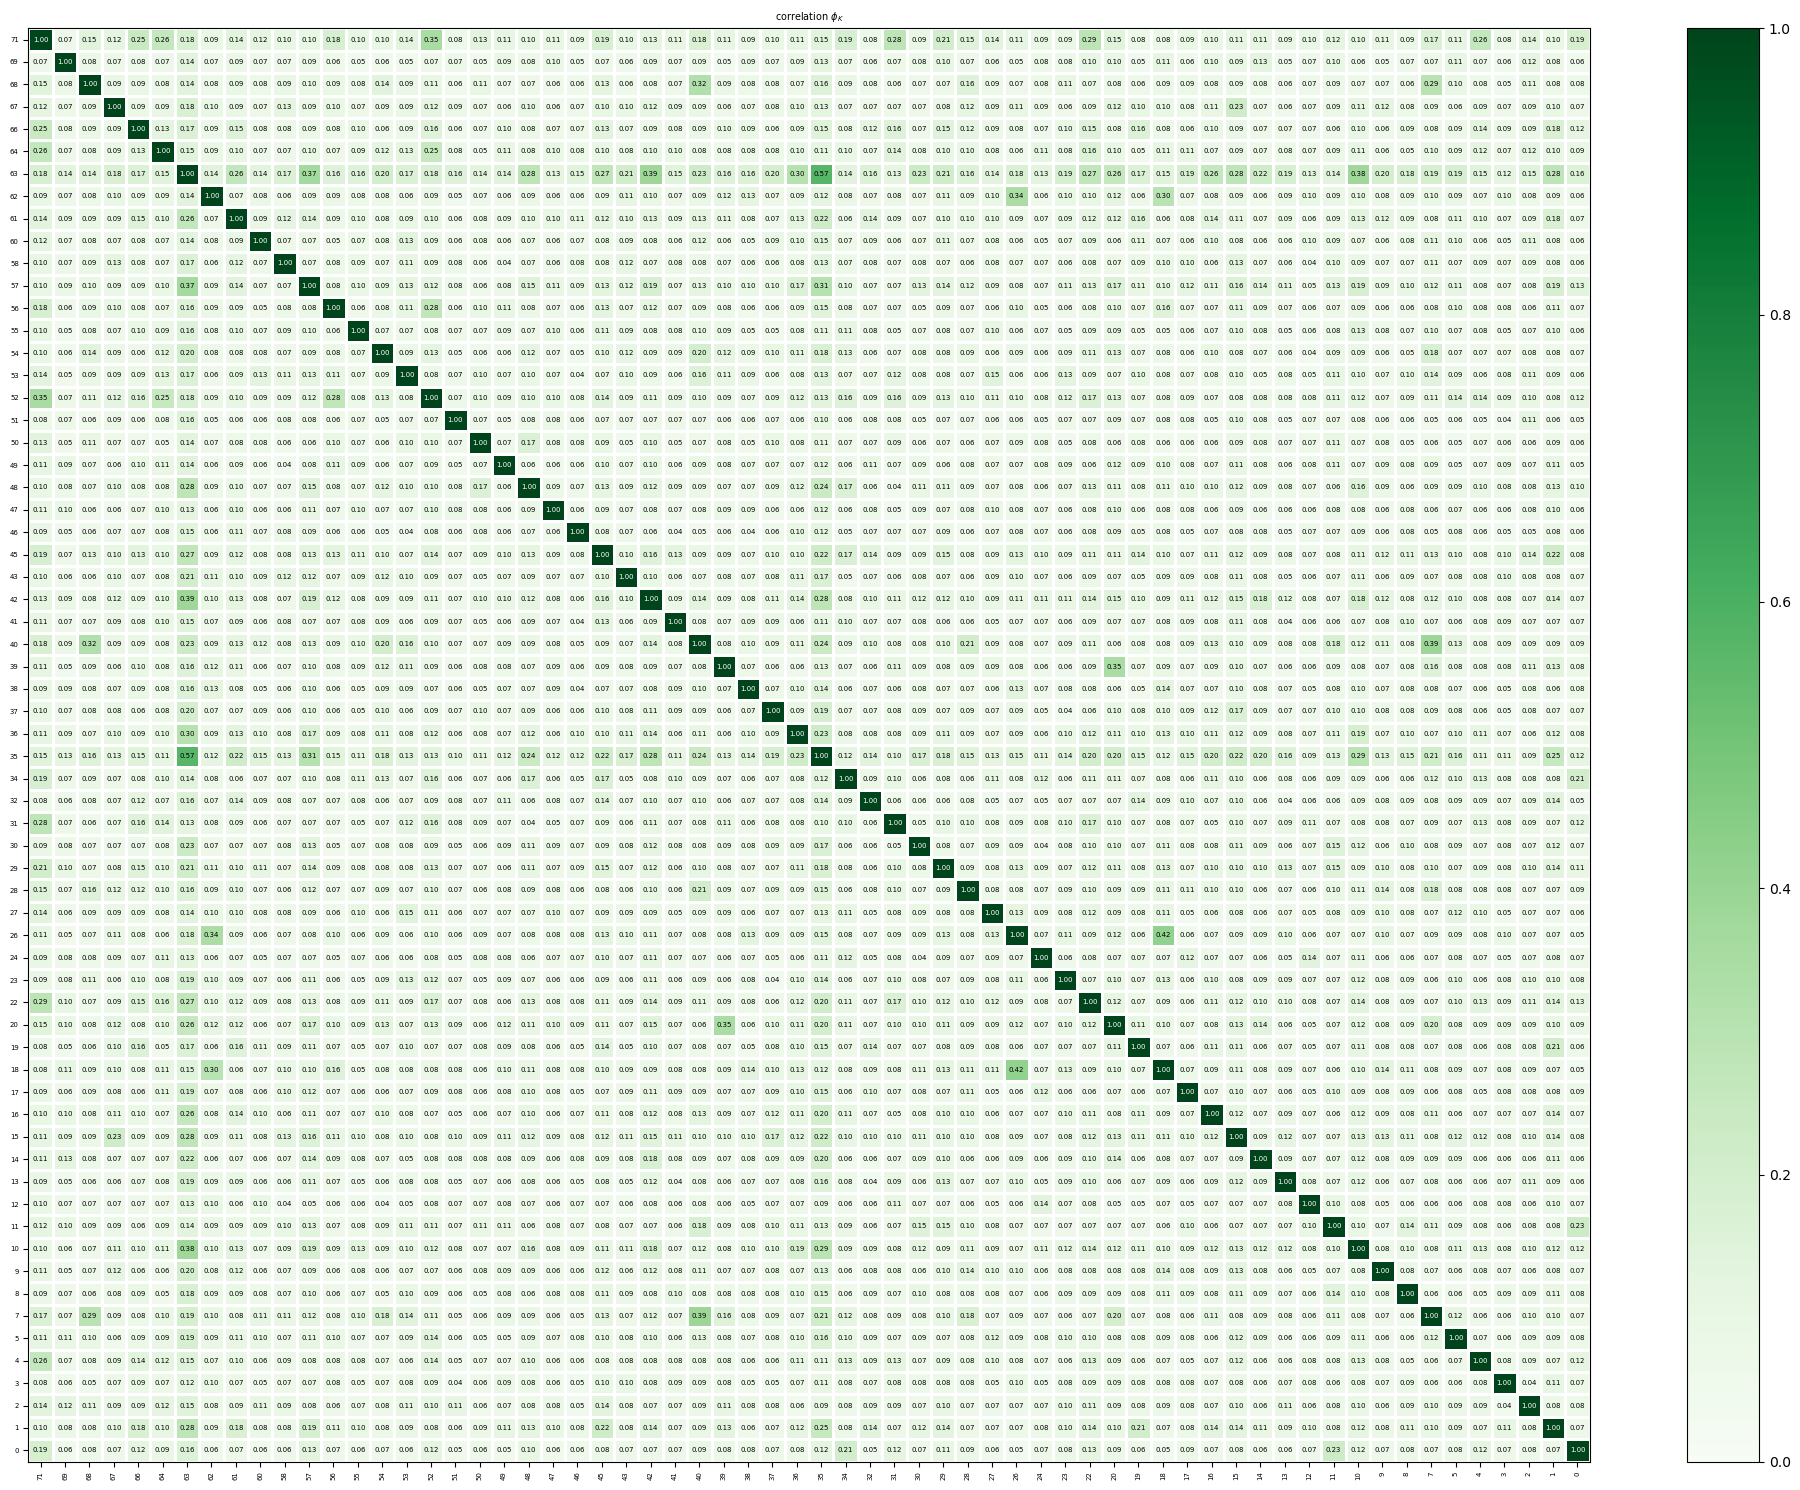

In [79]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=.5,
    figsize=(20, 15)
)

Мультиколлинеарности не наблюдается

## Кластеризация

In [82]:
df.head(5)

,Id,0,1,2,3,4,5,7,8,9,...,60,61,62,63,64,66,67,68,69,71
0,0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,44.348083,120.915344,181.449700,...,-64.518950,-138.77763,-42.808693,38.800827,-151.76218,63.66634,-4.703861,92.933610,115.269190,-60.830353
1,1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-35.637436,119.718636,195.234190,...,11.392853,-148.57166,-117.767525,41.100000,-157.82940,68.20211,24.346846,179.937930,116.834000,-59.524610
2,2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,62.381706,128.951450,164.381470,...,-101.581375,-134.65822,-76.397800,46.011803,-207.14442,65.56618,66.325680,81.073490,116.594154,-32.527206
3,3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-33.611237,122.031910,136.233580,...,-89.588715,-149.32669,-70.647940,-6.358921,-147.20105,66.20289,-20.566910,137.206940,117.474100,-72.915490
4,4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,45.182500,122.167180,112.119064,...,-100.565520,-125.31733,-57.199104,56.642403,-159.35184,66.76632,-2.505783,65.315285,135.051590,0.319401


In [83]:
df.index = df['Id']
df.index

Index(['0-base', '1-base', '2-base', '3-base', '4-base', '5-base', '6-base',
       '7-base', '8-base', '9-base',
       ...
       '4744747-base', '4744748-base', '4744749-base', '4744753-base',
       '4744754-base', '4744755-base', '4744759-base', '4744762-base',
       '4744763-base', '4744766-base'],
      dtype='object', name='Id', length=2918139)

In [84]:
scaled_features = df.drop(['Id'], axis=1)

scaled_features_train = df_train.drop(['Id', 'Target'], axis=1)
target_train = df_train['Target']

scaled_features_validation = df_validation.drop(['Id'], axis=1)
target_validation = df_validation_target['Expected']

In [85]:
scaler = StandardScaler()

In [86]:
scaled_features.head()

,0,1,2,3,4,5,7,8,9,10,...,60,61,62,63,64,66,67,68,69,71
Id,,,,,,,,,,,,,,,,,,,,,
0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,44.348083,120.915344,181.449700,-124.06151,...,-64.518950,-138.77763,-42.808693,38.800827,-151.76218,63.66634,-4.703861,92.933610,115.269190,-60.830353
1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-35.637436,119.718636,195.234190,-141.30435,...,11.392853,-148.57166,-117.767525,41.100000,-157.82940,68.20211,24.346846,179.937930,116.834000,-59.524610
2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,62.381706,128.951450,164.381470,-140.82245,...,-101.581375,-134.65822,-76.397800,46.011803,-207.14442,65.56618,66.325680,81.073490,116.594154,-32.527206
3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-33.611237,122.031910,136.233580,-108.47044,...,-89.588715,-149.32669,-70.647940,-6.358921,-147.20105,66.20289,-20.566910,137.206940,117.474100,-72.915490
4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,45.182500,122.167180,112.119064,-110.34245,...,-100.565520,-125.31733,-57.199104,56.642403,-159.35184,66.76632,-2.505783,65.315285,135.051590,0.319401


In [87]:
scaled_features = scaler.fit_transform(scaled_features)

In [88]:
scaled_features

array([[-1.15921621,  0.62035039, -0.51372266, ...,  0.29300367,
        -0.0140507 , -0.31232868],
       [ 2.07571479,  1.06042331, -0.65249099, ...,  1.71128272,
         0.05984761, -0.28105191],
       [ 1.2854173 , -0.34334213,  0.39787757, ...,  0.09966891,
         0.04852086,  0.36562327],
       ...,
       [-0.43377605, -2.06403506, -0.69096928, ..., -0.09665779,
         0.65973154,  1.25777364],
       [-0.02446461,  0.16793925,  0.25220423, ...,  0.31775314,
         0.43807345, -0.19157949],
       [-0.63218019,  0.96487998, -0.17634065, ...,  0.15518477,
        -1.07356491,  1.49865842]])

In [89]:
scaled_features = pd.DataFrame(scaled_features, columns = df.drop(['Id'], axis=1).columns, index=df['Id'])

In [90]:
scaled_features_train = scaler.transform(scaled_features_train)
scaled_features_train = pd.DataFrame(scaled_features_train, columns = df_train.drop(['Id', 'Target'], axis=1).columns)

In [91]:
scaled_features_validation = scaler.transform(scaled_features_validation)
scaled_features_validation = pd.DataFrame(scaled_features_validation, columns = df_validation.drop(['Id'], axis=1).columns)

In [92]:
%%time
from tqdm import tqdm
inertia_score = []
db_score = []
k_means_df = pd.DataFrame(columns = ['k', 'db_score', 
                                     #'sil_score', 
                                     'ch_score', 'wcss_score'])
max_n_clusters = range(10, 500, 10) 
for n in tqdm(max_n_clusters):
    model = KMeans(n_clusters=n, max_iter = 300, n_init="auto", random_state=0).fit(scaled_features)
    
    class_predictions = model.predict(scaled_features)
    
    metric_db = davies_bouldin_score(scaled_features, class_predictions)
#    metric_sil = silhouette_score(scaled_features, class_predictions)
    metric_ch = calinski_harabasz_score(scaled_features, class_predictions)
    metric_wcss = model.inertia_
    
    temp = pd.DataFrame({'k':n,
                           'db_score': metric_db,
#                                   'sil_score': metric_sil,
                           'ch_score': metric_ch,
                           'wcss_score':metric_wcss}, index=[0])
    
    k_means_df = pd.concat([k_means_df, temp], ignore_index=True)
    
    

    inertia_score.append(model.inertia_)
    labels = model.labels_
    db = davies_bouldin_score(scaled_features, labels)
    db_score.append(db)
    
k_means_df = k_means_df.sort_values(by=['ch_score',
                                        #'sil_score',
                                        'db_score','wcss_score'], 
                                    ascending=[False,
                                               #False,
                                               True,True])    
k_best = k_means_df.k.head().to_list()
k_means_df = k_means_df.sort_values(by = 'k')

100%|███████████████████████████████████████████████████████████████████████████████| 49/49 [2:34:16<00:00, 188.92s/it]

CPU times: total: 19h 22min 38s
Wall time: 2h 34min 17s


In [93]:
k_means_df = k_means_df.sort_values(by=['ch_score',
                                        #'sil_score',
                                        'db_score','wcss_score'], 
                                    ascending=[False,
                                               #False,
                                               True,True]) 
k_means_df

,k,db_score,ch_score,wcss_score
0,10,4.954904,34781.739906,1.686675e+08
1,20,4.191615,26613.933960,1.591779e+08
2,30,3.627221,22571.260449,1.525436e+08
3,40,3.287373,20174.514946,1.470990e+08
4,50,3.171399,18231.929894,1.429861e+08
5,60,3.161033,16589.912399,1.398510e+08
6,70,3.016961,15523.228305,1.366151e+08
7,80,2.985688,14664.106207,1.336873e+08
8,90,2.955713,13682.116385,1.317721e+08
9,100,2.911887,12995.884150,1.296132e+08


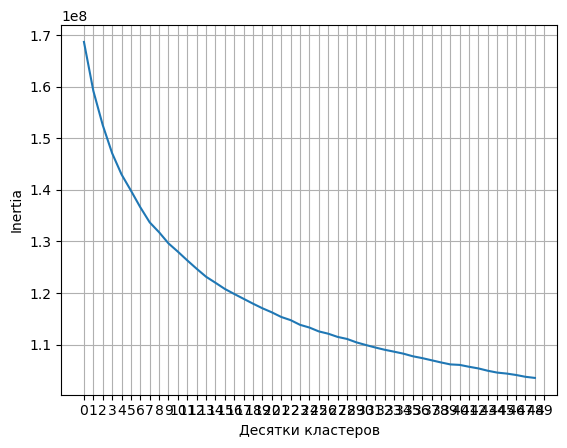

In [94]:
plt.plot(inertia_score)
plt.xlabel("Десятки кластеров")
plt.ylabel('Inertia')
plt.grid()
plt.xticks(np.arange(0, 50, step=1))
plt.rcParams['font.size'] = 7
plt.show();

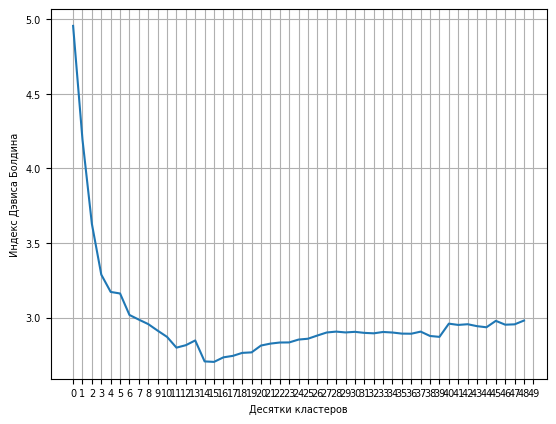

In [95]:
plt.plot(db_score)
plt.xlabel("Десятки кластеров")
plt.ylabel('Индекс Дэвиса Болдина')
plt.grid()
plt.xticks(np.arange(0, 50, step=1))
plt.rcParams['font.size'] = 5
plt.show();

In [96]:
ch = k_means_df['ch_score'].to_list()
ch

[34781.739905819595,
 26613.933959581624,
 22571.26044921812,
 20174.51494581562,
 18231.9298938068,
 16589.91239872894,
 15523.228305437553,
 14664.10620656962,
 13682.11638520366,
 12995.884149574276,
 12287.61565691586,
 11733.749555375503,
 11259.69797189291,
 10844.165721547291,
 10400.178491510738,
 10025.360708086027,
 9649.020920144176,
 9311.019874554788,
 9011.603011343948,
 8735.581720816728,
 8468.465399454068,
 8247.963966135365,
 7998.562806625963,
 7822.111084322062,
 7597.504924488423,
 7427.731455862994,
 7222.800618170275,
 7061.114096189167,
 6876.852526932276,
 6745.183299024596,
 6601.141187928281,
 6462.440524371315,
 6327.110261830915,
 6190.92624990583,
 6064.711271020352,
 5961.51561623957,
 5845.569250838489,
 5743.78614896446,
 5647.580696730024,
 5552.486882736982,
 5428.084257749754,
 5340.631513952866,
 5253.058844672738,
 5183.944574777084,
 5107.97705077032,
 5016.831391460173,
 4939.282145181123,
 4873.261985950077,
 4796.09651949512]

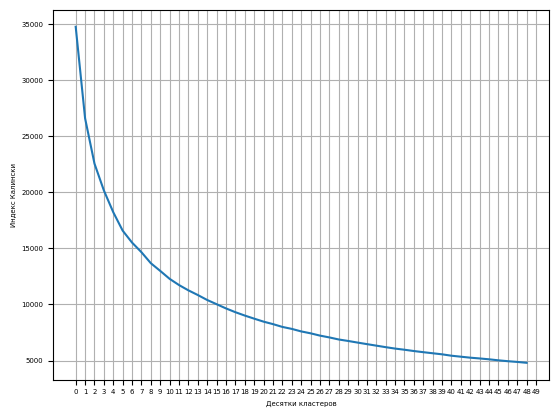

In [97]:
plt.plot(ch)
plt.xlabel("Десятки кластеров")
plt.ylabel('Индекс Калински')
plt.grid()
plt.xticks(np.arange(0, 50, step=1))
plt.rcParams['font.size'] = 5
plt.show();

Как будто ни Калински ни Инертия мне ничего не подсказали - буду ориентироваться только на метрику ДБ и у нее локальный минимум в районе 140 кластеров

## Моделирование knn

In [100]:
result = np.empty(scaled_features_train.shape[0], dtype=object)
kmeans = KMeans(n_clusters=140, n_init="auto", random_state=0)
scaled_features['cluster'] = kmeans.fit_predict(scaled_features)
scaled_features_train['cluster'] = kmeans.predict(scaled_features_train)

In [101]:
for i in tqdm(range(0, 140)):
    features_cluster = scaled_features[scaled_features['cluster'] == i]
    features_valid_cluster = scaled_features_train[scaled_features_train['cluster'] == i]
    if len(features_valid_cluster) == 0:
        continue
    features_cluster = features_cluster.drop(['cluster'], axis=1)
    features_valid_cluster = features_valid_cluster.drop(['cluster'], axis=1)

    nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
    nbrs.fit(features_cluster)
    indices = nbrs.kneighbors(features_valid_cluster, return_distance=False)

    for i in range(len(indices)):
          idx_train = features_valid_cluster.index[i]
          for ii in indices[i]:
              idx_full = features_cluster.index[ii]
              if result[idx_train] is None:
                result[idx_train] = [idx_full]
              else:
                result[idx_train].append(idx_full)


100%|████████████████████████████████████████████████████████████████████████████████| 140/140 [04:20<00:00,  1.86s/it]


In [102]:
scaled_features.drop(['cluster'], axis=1, inplace=True)
scaled_features_train.drop(['cluster'], axis=1, inplace=True) 

In [103]:
result

array([list(['361564-base', '1375561-base', '2515747-base', '530165-base', '244376-base']),
       list(['15226-base', '3883204-base', '234491-base', '1075687-base', '511045-base']),
       list(['1447819-base', '179726-base', '2456246-base', '142037-base', '3779305-base']),
       ...,
       list(['2366140-base', '4264966-base', '1536337-base', '3260307-base', '480724-base']),
       list(['2422992-base', '2212746-base', '1427246-base', '1079397-base', '1142018-base']),
       list(['2769109-base', '3599061-base', '188593-base', '3551918-base', '473313-base'])],
      dtype=object)

In [104]:
acc = 0
for value, nearest in zip(target_train, result):
    acc += int(value in nearest)
acc = 100 * acc / len(result)
acc

63.064

## Моделирование Faiss

In [106]:
result = np.empty(scaled_features_train.shape[0], dtype=object)
    
dim = len(scaled_features.columns)
index = faiss.IndexFlatL2(dim)
index.add(scaled_features)

distance, indices = index.search(scaled_features_train, 5)  

for i in range(len(indices)):
  for ii in indices[i]:
      idx_full = scaled_features.index[ii]
      if result[i] is None:
        result[i] = [idx_full]
      else:
        result[i].append(idx_full)

In [107]:
result

array([list(['361564-base', '1375561-base', '2515747-base', '530165-base', '244376-base']),
       list(['15226-base', '577617-base', '854272-base', '234491-base', '3883204-base']),
       list(['1447819-base', '179726-base', '2456246-base', '142037-base', '3779305-base']),
       ...,
       list(['2366140-base', '4264966-base', '1536337-base', '3260307-base', '480724-base']),
       list(['1079397-base', '1427246-base', '2212746-base', '2422992-base', '1142018-base']),
       list(['2769109-base', '771164-base', '1412044-base', '3599061-base', '188593-base'])],
      dtype=object)

In [108]:
acc = 0
for value, nearest in zip(target_train, result):
    acc += int(value in nearest)
acc = 100 * acc / len(result)
acc

71.079

## Валидация

In [110]:
result = np.empty(scaled_features_validation.shape[0], dtype=object)
    
dim = len(scaled_features.columns)
index = faiss.IndexFlatL2(dim)
index.add(scaled_features)

distance, indices = index.search(scaled_features_validation, 5)  

for i in range(len(indices)):
  for ii in indices[i]:
      idx_full = scaled_features.index[ii]
      if result[i] is None:
        result[i] = [idx_full]
      else:
        result[i].append(idx_full)

In [111]:
result

array([list(['2760762-base', '3209652-base', '1542803-base', '3839597-base', '508555-base']),
       list(['2666508-base', '163485-base', '11853-base', '3890545-base', '1000521-base']),
       list(['472256-base', '496010-base', '25113-base', '153272-base', '298322-base']),
       ...,
       list(['1801591-base', '2362444-base', '1200061-base', '654974-base', '3321919-base']),
       list(['341779-base', '4523822-base', '79148-base', '3024721-base', '668990-base']),
       list(['2503531-base', '2034870-base', '2818124-base', '337547-base', '4678196-base'])],
      dtype=object)

In [112]:
acc = 0
for value, nearest in zip(target_validation, result):
    acc += int(value in nearest)
acc = 100 * acc / len(result)
acc

70.988